## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

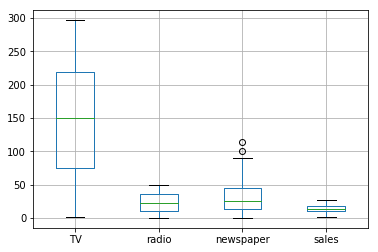

In [3]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

In [4]:
#plt.scatter(df)

C:\Users\CheeKHWQWJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


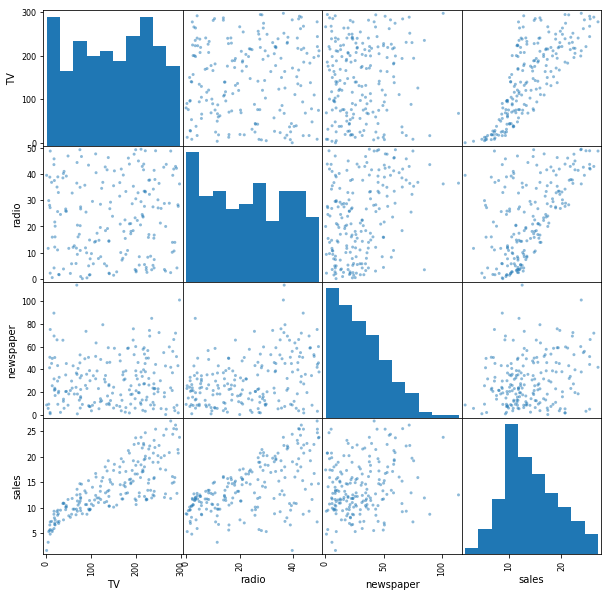

In [5]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, figsize=(10, 10))
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

Advertising dollars spent on TV seems most correlated with sales, thereby implying that spending more on TV advertisement corresponds to higher sales compared to spending on radio or newspaper advertisement (although we have to be wary that correlation is not causation). The advertising dollars on each of the 3 different medias are not correlated to each other. This could be because the decision to spend advertising on TV is independent of that spent on newspaper and radio.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [6]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [7]:
y = df['sales']

b) Set X to be just the features described above in df

In [8]:
X = df[['TV', 'radio', 'newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [9]:
# "Randomly" splitting the data into training and testing using the following from sklearn with test size 20%:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

d) Train model on training data, and make predictions on testing data

In [10]:
regr = LinearRegression()
regr.fit(X_train, y_train)
regr.predict(X_test)

array([ 16.4080242 ,  20.88988209,  21.55384318,  10.60850256,
        22.11237326,  13.10559172,  21.05719192,   7.46101034,
        13.60634581,  15.15506967,   9.04831992,   6.65328312,
        14.34554487,   8.90349333,   9.68959028,  12.16494386,
         8.73628397,  16.26507258,  10.27759582,  18.83109103,
        19.56036653,  13.25103464,  12.33620695,  21.30695132,
         7.82740305,   5.80957448,  20.75753231,  11.98138077,
         9.18349576,   8.5066991 ,  12.46646769,  10.00337695,
        21.3876709 ,  12.24966368,  18.26661538,  20.13766267,
        14.05514005,  20.85411186,  11.0174441 ,   4.56899622])

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [11]:
import numpy as np
SSreg = np.mean((regr.predict(X_test) - y_test) ** 2)
SStot =  np.mean((y_test - np.mean(y_test)) ** 2)
print("R^2: %.2f" % (1 - SSreg/SStot))

R^2: 0.90


The R^2 of 0.90 in the testing data is good because indicates that the predictive model is able to explain 90% of the variance in the testing data. A perfect model that fully accurately predicts in the testing data would have a R^2 of 1 so a R^2 of 0.90 in the testing data is pretty good. Furthermore, the R^2 is a scaling invariant measurement of performance of a model. It is worth noting that while a high R^2 in the testing data may be good, a high R^2 in the training data may be bad because it may indicate overfitting in the training data.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

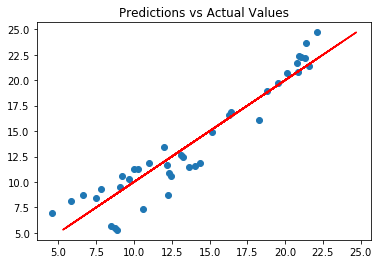

In [12]:
plt.title('Predictions vs Actual Values')
plt.scatter(regr.predict(X_test), y_test)
plt.plot(y_test,y_test, color = 'red')
plt.show()

It can be seen that it does appear to be a good model because most of the points fall on or near the red 45 degree line shown above, implying that predictions are close to the actual values (since the 45 degree line implies predictions = actual values).

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

Non-Standardized Coefficients: 
 [ 0.04472952  0.18919505  0.00276111]
Intercept: 
 2.97906733812


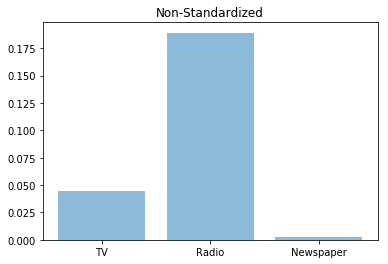

Standardized Coefficients: 
 [ 3.76419618  2.79230665  0.05597551]
Intercept: 
 14.1


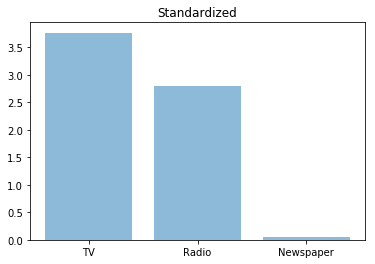

In [13]:
# Non-Standardized
regr = LinearRegression()
regr.fit(X_train, y_train)
print('Non-Standardized Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
advertising = ('TV', 'Radio', 'Newspaper')
coef = [0.04472952,0.18919505,0.00276111]
y_pos = np.arange(len(advertising))
plt.bar(y_pos,coef, align='center', alpha=0.5)
plt.xticks(y_pos, advertising)
plt.title('Non-Standardized')
plt.show()

# Standardized
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_train)
regr.fit(X_scaled, y_train)
print('Standardized Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
advertising = ('TV', 'Radio', 'Newspaper')
coef = [3.76419618,2.79230665,0.05597551]
y_pos = np.arange(len(advertising))
plt.bar(y_pos,coef, align='center', alpha=0.5)
plt.xticks(y_pos, advertising)
plt.title('Standardized')
plt.show()

A possible way to measure the importance of features in the model is by looking at the coefficients in the standardized regression above.  From the output, it can be seen that the feature representing TV advertising expenditure is the most important feature compared to the other features after standardization.

Before making conclusions however, a few things should be checked. Firstly, we should check if there is any interaction or dependence between the features because if there is an interaction or dependence, then a marginal change in one feature may not simply be governed by its coefficient but also by another feature's coefficient and the effect has to be summed up. Secondly, in order to compare coefficients we should check if the features have been normalized to have the same scale. Otherwise, we may be measuring a unit change in a different way and cannot compare the coefficients directly (this can be seen by the difference in the two bar graphs above - one for the non-standardized case and one for the standardized case).

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

The coefficicents from the standardized linear regression tells us that on average a dollar increase in TV advertising expenditure increases sales by 3.76 dollars, a dollar increase in radio advertising expenditure increases sales by 2.79 dollars, while an unit increase in newspaper advertising expenditure increases sales by 0.06 dollars, holding the other variables constant. As mentioned in g, it seems that TV adversiting expenditure is the most important feature as it has the largest magnitude.

To measure the importance of the features involved, we should firstly normalize or standardize the data (which was done), average the model over many random folds, and obtain confidence intervals (and p-values) to affirm the importance of the features by looking at its variance as well.


## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

In [14]:
# Plotting data and hyperplane
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Training the data to obtain coefficients
X_train2 = X_train[['TV','radio']]
regr = LinearRegression()
fit = regr.fit(X_train2, y_train)
print(fit.coef_, fit.intercept_)

[ 0.0447283   0.19066726] 3.02825525078


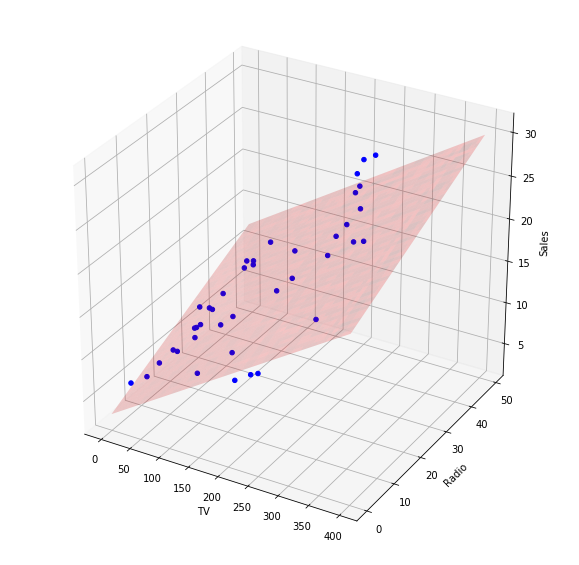

In [15]:
# Obtaining predicted values and plotting in a plane
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection='3d')
x_range = np.arange(0, 400)                
y_range = np.arange(0, 50)
x_range, y_range = np.meshgrid(x_range, y_range)
z = 0.0447283*x_range + 0.19066726*y_range + 3.028255
ax.plot_surface(x_range, y_range, z, alpha = 0.2, color = 'red')
ax.scatter(X_test['TV'], X_test['radio'], y_test, c='blue', marker='o', alpha=1)
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

It can be seen that there are quite a few actual test data (the blue points) that do not lie on the prediction plane. A possible way to improve the prediction accuracy is to include a new variable for the interaction between TV and radio advertising expenditure.

C:\Users\CheeKHWQWJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


R^2: 0.97


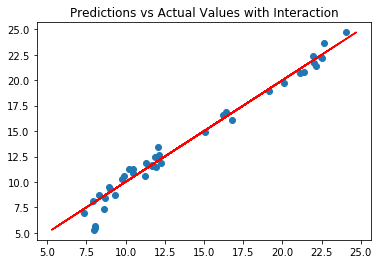

In [16]:
# Adding TV*radio interaction term and plotting linear graph
X = df[['TV', 'radio']] # without newspaper
X['TV*radio'] = X['TV']*X['radio']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regr = LinearRegression()
regr.fit(X_train, y_train)
regr.predict(X_test)
import numpy as np
SSreg = np.mean((regr.predict(X_test) - y_test) ** 2)
SStot =  np.mean((y_test - np.mean(y_test)) ** 2)
print("R^2: %.2f" % (1 - SSreg/SStot))
plt.title('Predictions vs Actual Values with Interaction')
plt.scatter(regr.predict(X_test), y_test)
plt.plot(y_test,y_test, color = 'red')
plt.show()

In [17]:
# Creating the hyperplane
regr = LinearRegression()
fit = regr.fit(X_train, y_train)
print(fit.coef_, fit.intercept_)

[ 0.01960636  0.03494256  0.0010502 ] 6.68499669179


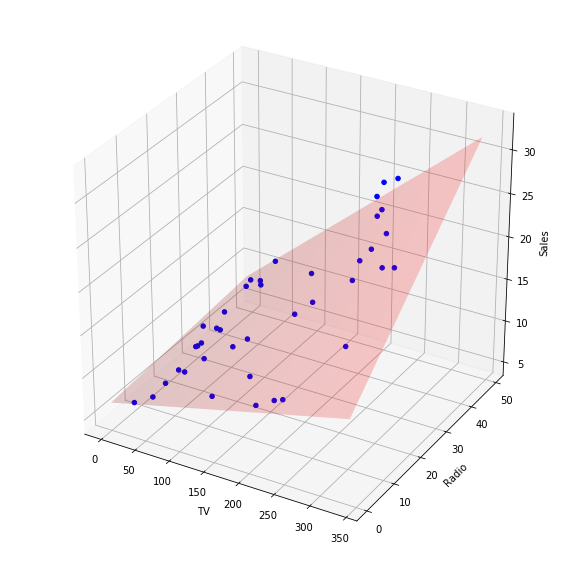

In [18]:
# Obtaining predicted values and plotting in a plane
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection='3d')
x_range = np.arange(0, 350, 20)                
y_range = np.arange(0, 50, 4)
x_range, y_range = np.meshgrid(x_range, y_range)
xy_range = x_range * y_range
z = 0.01960636*x_range + 0.03494256*y_range + 0.0010502*xy_range + 6.68499669179
ax.plot_surface(x_range, y_range, z, alpha = 0.2, color = 'red')
ax.scatter(X_test['TV'], X_test['radio'], y_test, c='blue', marker='o', alpha=1)
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

It can be seen that the predicted values are much closer to the actual values now (nearer to the 45 degree red line which indicate predicted = actual values) compared to when the interaction term was not present. Most of the test data points also lie on the hyperplane now. The R^2 value is also higher indicating adding the interaction term between 'TV' and 'radio' helped increase prediction accuracy.

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


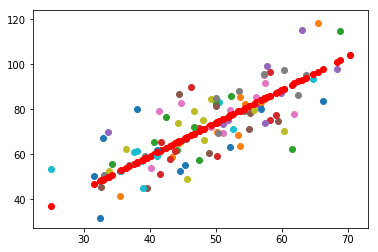

In [19]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]


def run(num_iterations,learning_rate = 0.0001):
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print("Starting gradient descent at b = {}, m = {}, error = {}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {} iterations b = {}, m = {}, error = {}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


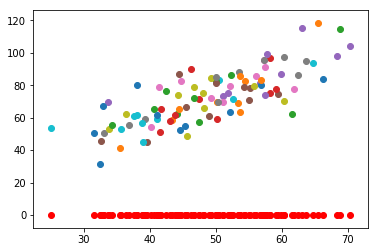

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


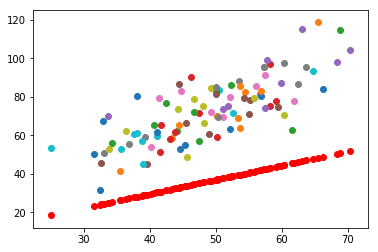

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


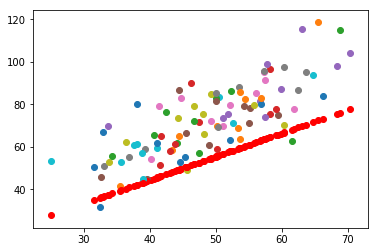

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


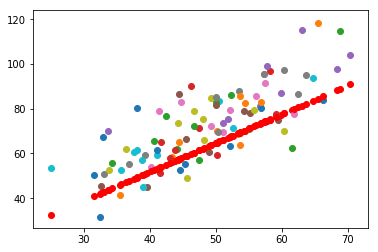

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


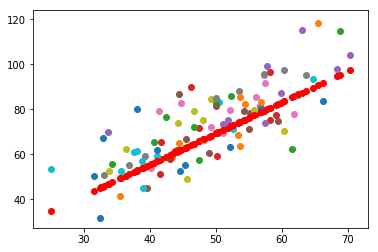

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


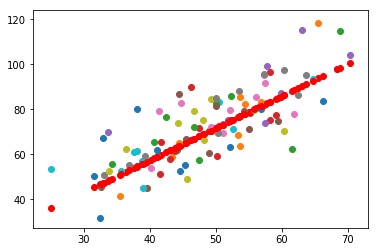

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


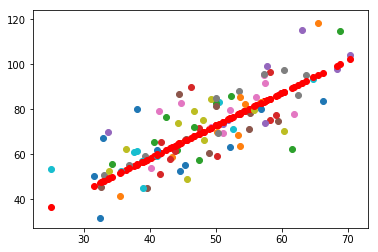

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


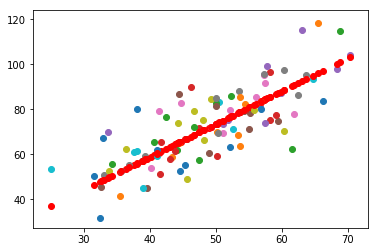

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


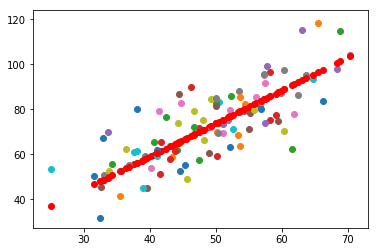

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


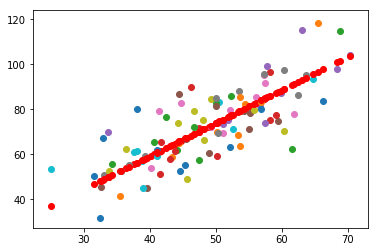

In [20]:
# Use this to visually discuss convergence rate based on learning rate
# For the default learning rate = 0.0001 and 10 iterations

#for num in range(0,10):
#    run(num)
#    plt.show()

for i in range(0,10):
    run(i)
    plt.show()

It can be seen that the error converges to approximately 112 after 7 iterations for the default learning rate = 0.0001. Now try for a higher value of learning rate = 0.0005

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


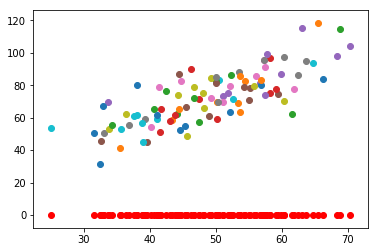

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.07273505055368648, m = 3.685351486795526, error = 12248.923658059466


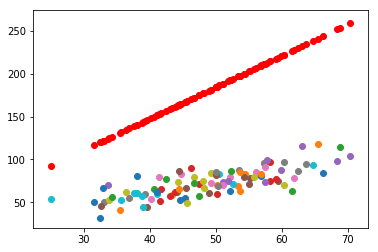

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -0.03503133043958161, m = -1.812925535576324, error = 27125.9989614646


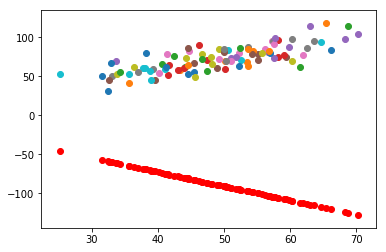

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.12649657885967047, m = 6.390068174869519, error = 60239.92274554496


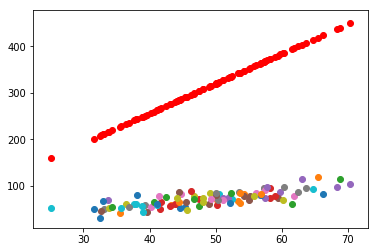

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -0.11374200683340807, m = -5.848185220212095, error = 133946.07277683076


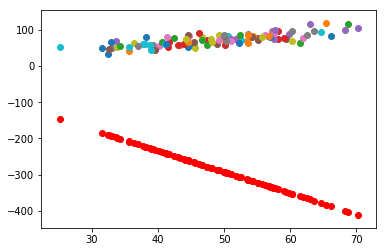

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.24542423466870028, m = 12.410337296692443, error = 298003.84433146904


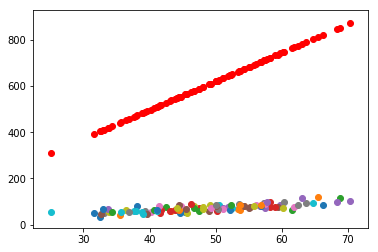

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -0.28967567003687617, m = -14.829995329449478, error = 663169.4699413386


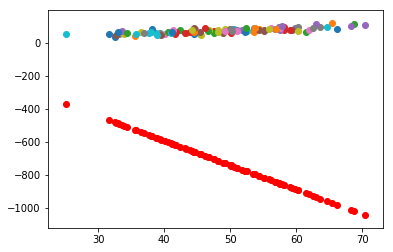

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.5094010313993653, m = 25.81048099761001, error = 1475968.1128761834


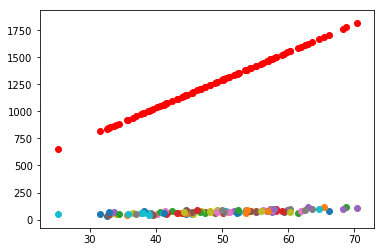

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -0.6820116610464277, m = -34.822013381765444, error = 3285124.253337868


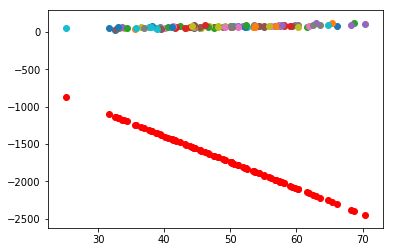

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 1.096233422691767, m = 55.6370121244165, error = 7312008.363935543


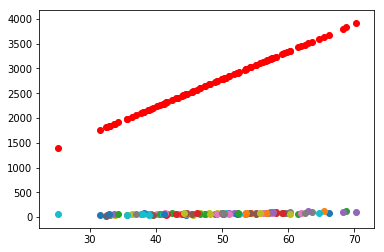

In [21]:
# For larger learning rate = 0.0005 and 10 iterations

#for num in range(0,10):
#    run(num)
#    plt.show()

for i in range(0,10):
    run(i, 0.0005)
    plt.show()

It can be seen that for a higher learning rate = 0.0005, convergence does not occur at all within 10 iterations as the error rate stays large. The reason this occurs is that the learning rate is too big so the gradient descent overshoots the minimum and oscillates back and forth. Now try for a lower value of the learning rate than the default. Try learning rate = 0.00005.

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


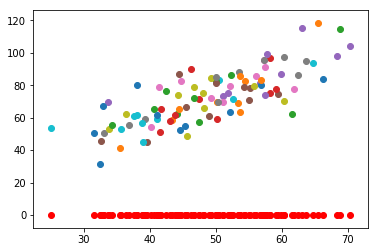

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.0072735050553686485, m = 0.3685351486795526, error = 3186.2669183340686


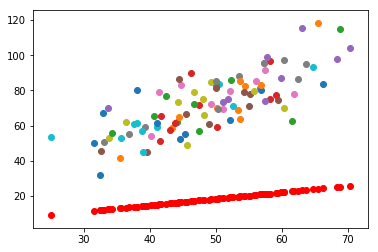

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.01274199579526775, m = 0.6452340122674316, error = 1845.2854193756275


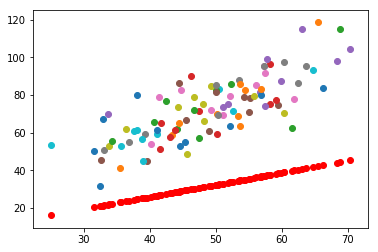

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.016855267941536783, m = 0.8529814900056218, error = 1089.3578680541548


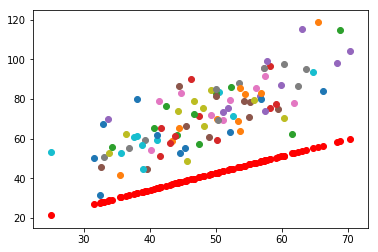

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.019951031565302785, m = 1.0089597394280754, error = 663.2323265001876


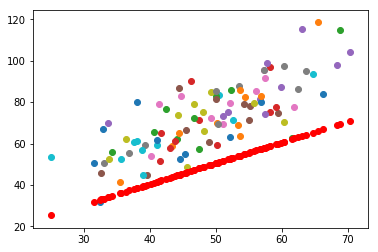

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.022282841973126334, m = 1.1260692559400733, error = 423.02017991777734


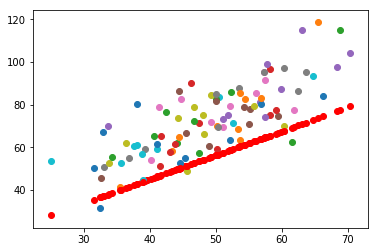

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02404107043012985, m = 1.2139958302447225, error = 287.60967009381125


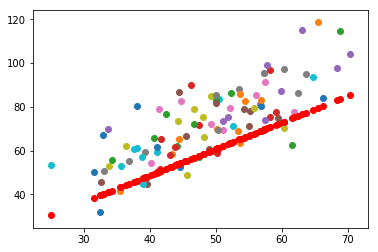

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.025368649139452446, m = 1.2800116281462905, error = 211.27711465249791


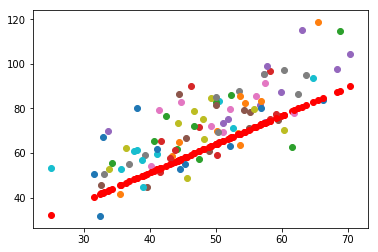

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.026372892693351885, m = 1.329576647398786, error = 168.24751899306284


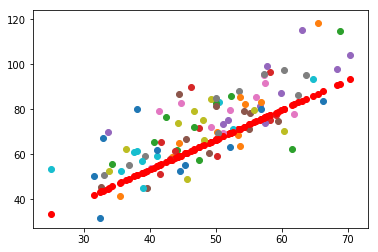

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.02713437370918469, m = 1.366790296112002, error = 143.99120588588545


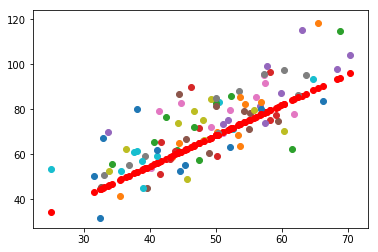

In [22]:
# For smaller learning rate = 0.00005 and 10 iterations

#for num in range(0,10):
#    run(num)
#    plt.show()

for i in range(0,10):
    run(i, 0.00005)
    plt.show()

It can be seen that for a lower learning rate = 0.00005 compared to the default of 0.0001, convergence occurs more slowly as the error still decreases as iteration number increases such that after the 10th iteration, the error still reduces from 168 to 144. This can be contrasted to the default learning rate whereby after the 7th iteration, the error stays at approximately 112. The reason this slower convergence occurs is that the updating of the parameter which minimizes the convex error function after each iteration happens with smaller values since the learning rate is the factor that controls how big a "step" is taken for the gradient descent and the learning rate is small. This results in a need for more "steps" to find the minimum and thereby a longer time before convergence occurs.

Mathematically, the parameter $\beta$ that minimizes the error function can be expressed as: $$\beta_n = \beta_{n-1} + \kappa\nabla_{\beta} L (\beta_{n-1})$$

$\kappa$ is the learning rate which determines how much the gradient descent function updates the parameter $\beta$ that minimizes the error function after each iteration. As shown by modifying the learning rate $\kappa$ above, if $\kappa$ is small, then the new $\beta_n$ will still be very close to $\beta_{n-1}$ thereby requiring more iterations in order to reach the optimal $\beta$ that will minimze the error function. Conversely, if $\kappa$ is too large, then the optimal $\beta$ may be missed as the new $\beta_n$ will be measurably different from $\beta_{n-1}$ such that even with more iterations, the error function will simply oscillate back and forth since the optimal $\beta$ was missed. In this example, the optimal learning rate $\kappa$ appears to be around the default 0.0001 - 0.0005 is too large and 0.00005 is too small.

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

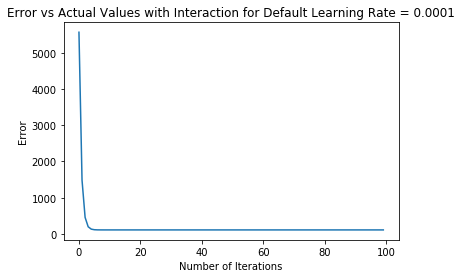

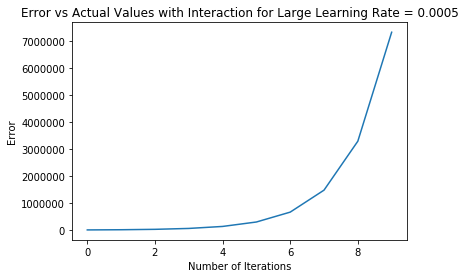

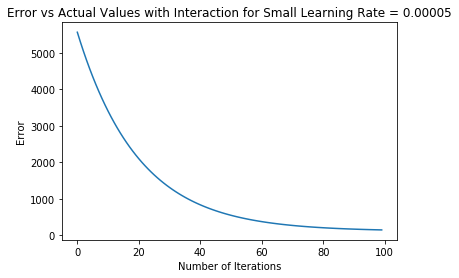

In [29]:
def errorgen(learning_rate, num_iterations):
    points = genfromtxt("data.csv", delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error = (compute_error_for_line_given_points(b, m, points))
    return error


error = [errorgen(0.0001, i) for i in range(100)]
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.plot(error)
plt.title('Error vs Actual Values with Interaction for Default Learning Rate = 0.0001')
plt.show()

error = [errorgen(0.0005, i) for i in range(10)]
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.plot(error)
plt.title('Error vs Actual Values with Interaction for Large Learning Rate = 0.0005')
plt.show()


error = [errorgen(0.000005, i) for i in range(100)]
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.plot(error)
plt.title('Error vs Actual Values with Interaction for Small Learning Rate = 0.00005')
plt.show()


The above are 3 graphs of error as a function of the number of iterations for various learning rates (the default learning rate = 0.0001, a large learning rate = 0.0005, and a small learning rate = 0.00005). It can be quite clearly seen that for the default learning rate, convergence to the minimum error is achieved very quickly after about 10 iterations. On the oher hand, for a large learning rate, there is actually divergence as the error increases with the number of iterations - this occurs because as explained earlier, with a large learning rate, the gradient descent overshoots the minimum and oscillates back and forth. Finaly, for a small learning rate, convergence occurs but at a much slower rate (after many more iterations) because the updating of parameters occurs very slowly and many more iterations are needed in order to obtain the optimal parameter that minimizes the error function.